In [1]:
#!/usr/bin/env python
import os
import sys
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [2]:
import wuml 

In [3]:
data = wuml.wData('../../data/shap_regress_example_uniform.csv', label_column_name='label', label_type='continuous', first_row_is_label=True)

In [4]:
reg = wuml.regression(data, regressor='AdaBoost', alpha=0.05, gamma=0.05, l1_ratio=0.05)
wuml.jupyter_print('Running a single regressor')
wuml.jupyter_print(reg.result_summary(print_out=False))

wuml.jupyter_print('Out coefficient importance')
reg.output_sorted_feature_importance_table(data.columns)

,Train mse,Test mse,Train r2 Score,Test r2 Score,Train avg abs error,Test avg abs error,Train max error,Test max error
AdaBoost,0.1231,0.7686,0.99,0.8964,0.257,0.7626,0.8311,1.2543


,Coefficients
D,21.232042
A,1.655635
B,0.050735
C,0.030395


,Train mse,Test mse,Train r2 Score,Test r2 Score,Train avg abs error,Test avg abs error,Train max error,Test max error
Predef_NeuralNet,0.0002,0.0075,1.0000,0.9990,0.0113,0.0665,0.0273,0.1414
linear,0.0262,0.0302,0.9979,0.9959,0.1413,0.1429,0.3320,0.2181
NeuralNet,0.0268,0.0391,0.9978,0.9947,0.1210,0.1846,0.5027,0.2814
Ridge,0.0474,0.0396,0.9961,0.9947,0.1646,0.1778,0.5794,0.3000
GP,0.0000,0.0726,1.0000,0.9902,0.0000,0.2267,0.0000,0.4176
Lasso,0.3735,0.1445,0.9696,0.9805,0.4847,0.3559,1.2618,0.4858
kernel ridge,1.0822,0.5347,0.9118,0.9279,0.7969,0.5987,2.2281,1.1554
AdaBoost,0.1231,0.7686,0.9900,0.8964,0.2570,0.7626,0.8311,1.2543
Elastic net,3.0305,1.6645,0.7530,0.7757,1.3607,0.9655,3.6089,2.1284
RandomForest,0.4698,2.2157,0.9617,0.7014,0.5729,1.2931,1.4607,2.0636


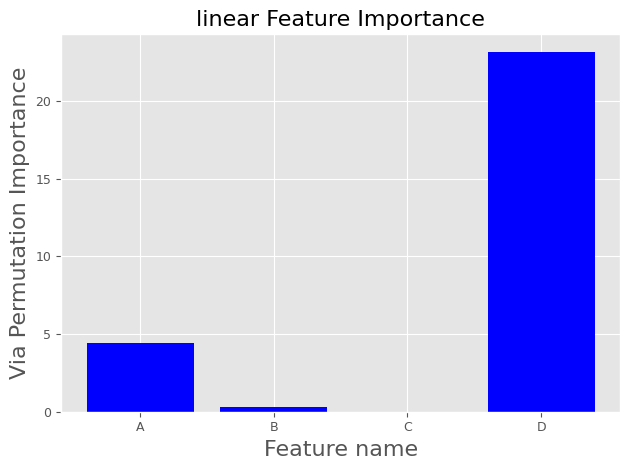

In [5]:
wuml.jupyter_print('\n\nRun all regressors sorted by least test error')
result = wuml.run_every_regressor(data, alpha=0.1, gamma=0.05, l1_ratio=0.05)
wuml.jupyter_print(result['Train/Test Summary'])
result['linear'].plot_feature_importance('linear Feature Importance', data.columns)